In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
plt.style.use("seaborn-v0_8-darkgrid")
# Configuración de estilo para que se vean profesionales

In [4]:
path = "../data/processed/data_processed.csv"

df = pd.read_csv(path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NIT                     40000 non-null  object 
 1   RAZÓN SOCIAL            39997 non-null  object 
 2   SUPERVISOR              40000 non-null  object 
 3   REGIÓN                  40000 non-null  object 
 4   DEPARTAMENTO DOMICILIO  40000 non-null  object 
 5   CIUDAD DOMICILIO        40000 non-null  object 
 6   CIIU                    40000 non-null  int64  
 7   MACROSECTOR             40000 non-null  object 
 8   INGRESOS OPERACIONALES  40000 non-null  float64
 9   GANANCIA (PÉRDIDA)      40000 non-null  float64
 10  TOTAL ACTIVOS           40000 non-null  float64
 11  TOTAL PASIVOS           40000 non-null  float64
 12  TOTAL PATRIMONIO        40000 non-null  float64
 13  AÑO DE CORTE            40000 non-null  object 
 14  DESCRIPCCIÓN CIIU       40000 non-null

In [5]:
df.head()

,NIT,RAZÓN SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES,GANANCIA (PÉRDIDA),TOTAL ACTIVOS,TOTAL PASIVOS,TOTAL PATRIMONIO,AÑO DE CORTE,DESCRIPCCIÓN CIIU
0,"899,999,068",ECOPETROL SA,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,610,MINERO,144.82,33.41,216.85,125.81,91.03,"2,022",Extracción de petróleo crudo
1,"900,112,515",REFINERIA DE CARTAGENA SAS,SUPERSOCIEDADES,Costa Atlántica,BOLIVAR,CARTAGENA-BOLIVAR,1921,MANUFACTURA,27.86,2.19,42.84,16.48,26.36,"2,022",Fabricación de productos de hornos de coque
2,"830,095,213",ORGANIZACIÓN TERPEL SA,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,4661,COMERCIO,23.60,0.33,7.48,4.47,3.01,"2,022","Comercio al por mayor de combustibles sólidos,..."
3,"860,069,804",CARBONES DEL CERREJON LIMITED,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,510,MINERO,16.39,6.05,10.45,9.00,1.45,"2,022",Extracción de hulla (carbón de piedra)
4,"800,021,308",DRUMMOND LTD,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,510,MINERO,15.27,2.16,14.27,6.34,7.93,"2,022",Extracción de hulla (carbón de piedra)


In [6]:
df.describe()

,CIIU,INGRESOS OPERACIONALES,GANANCIA (PÉRDIDA),TOTAL ACTIVOS,TOTAL PASIVOS,TOTAL PATRIMONIO
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,4592.107800,0.167670,0.013160,0.218061,0.110702,0.107080
std,2327.479541,1.392991,0.254042,2.369618,1.345162,1.117528
min,111.000000,0.010000,-3.210000,0.000000,0.000000,-3.690000
25%,3091.000000,0.030000,0.000000,0.020000,0.010000,0.010000
50%,4659.000000,0.040000,0.000000,0.030000,0.020000,0.010000
75%,6190.000000,0.100000,0.010000,0.090000,0.050000,0.040000
max,9900.000000,144.820000,33.410000,216.850000,130.540000,91.030000


## Análisis Univariado

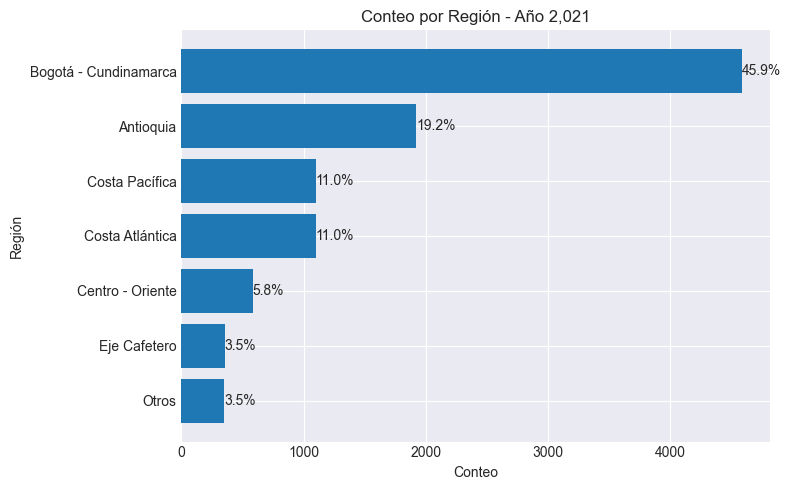

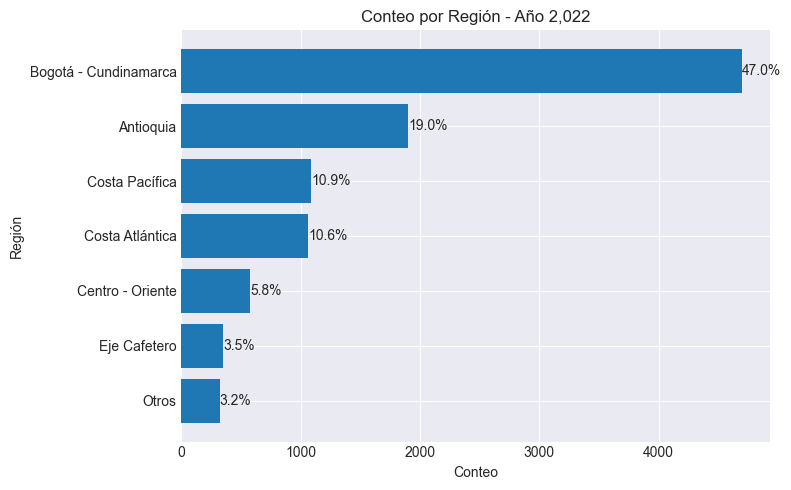

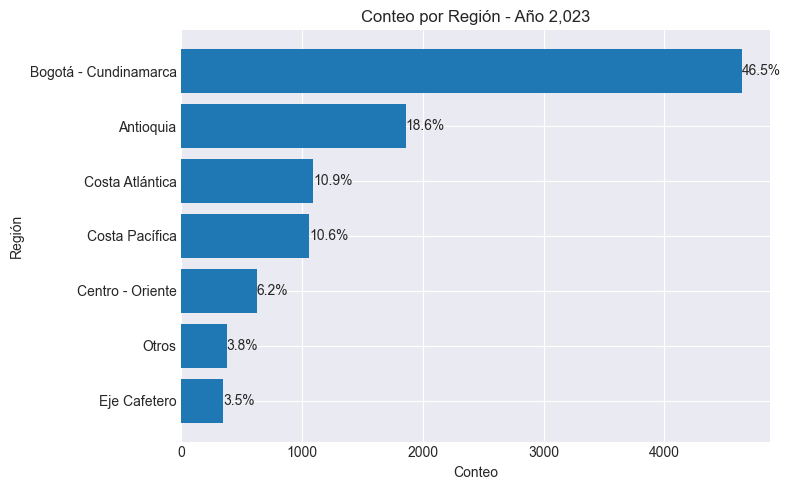

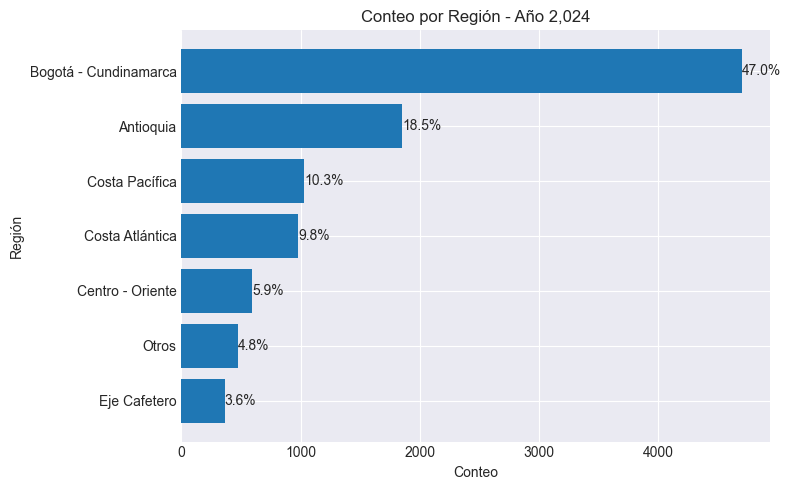

In [25]:
anios = sorted(df["AÑO DE CORTE"].dropna().unique())

for anio in anios:

    df_anio = df[df["AÑO DE CORTE"] == anio]

    conteo = df_anio["REGIÓN"].value_counts().sort_values(ascending=True)


    porcentaje = (conteo / conteo.sum()) * 100

    plt.figure(figsize=(8, 5))
    plt.barh(conteo.index, conteo.values)

    for i, (cnt, pct) in enumerate(zip(conteo.values, porcentaje.values)):
        plt.text(cnt + 0.3, i, f"{pct:.1f}%", va="center")

    plt.xlabel("Conteo")
    plt.ylabel("Región")
    plt.title(f"Conteo por Región - Año {anio}")
    plt.tight_layout()
    plt.show()



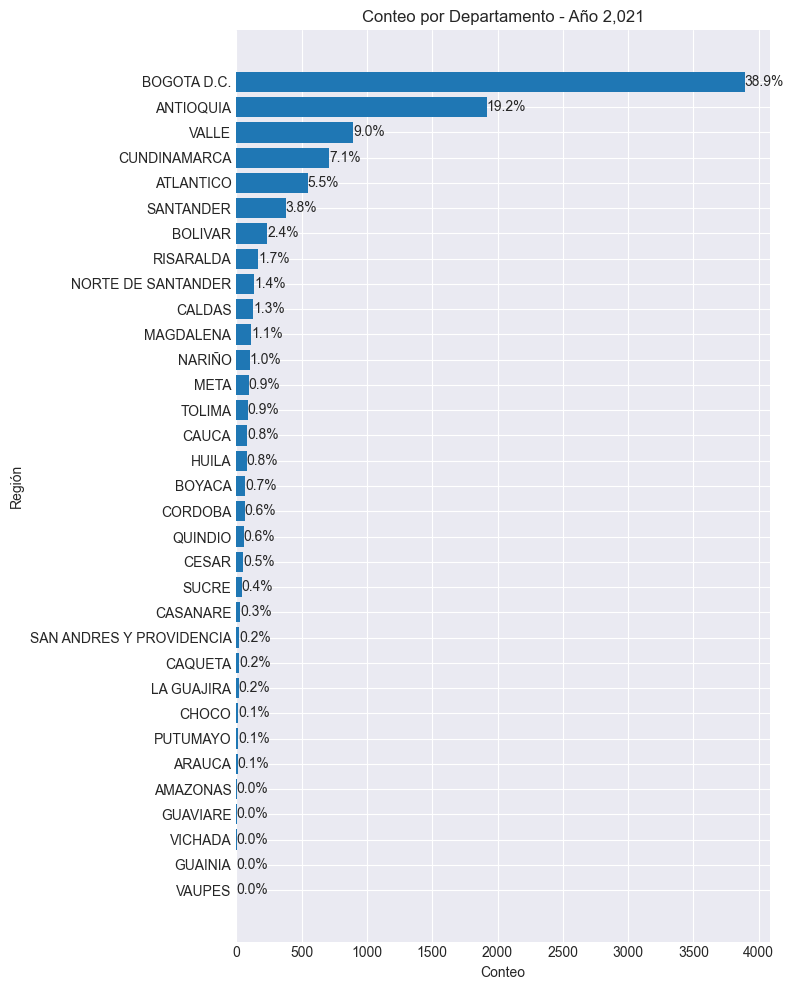

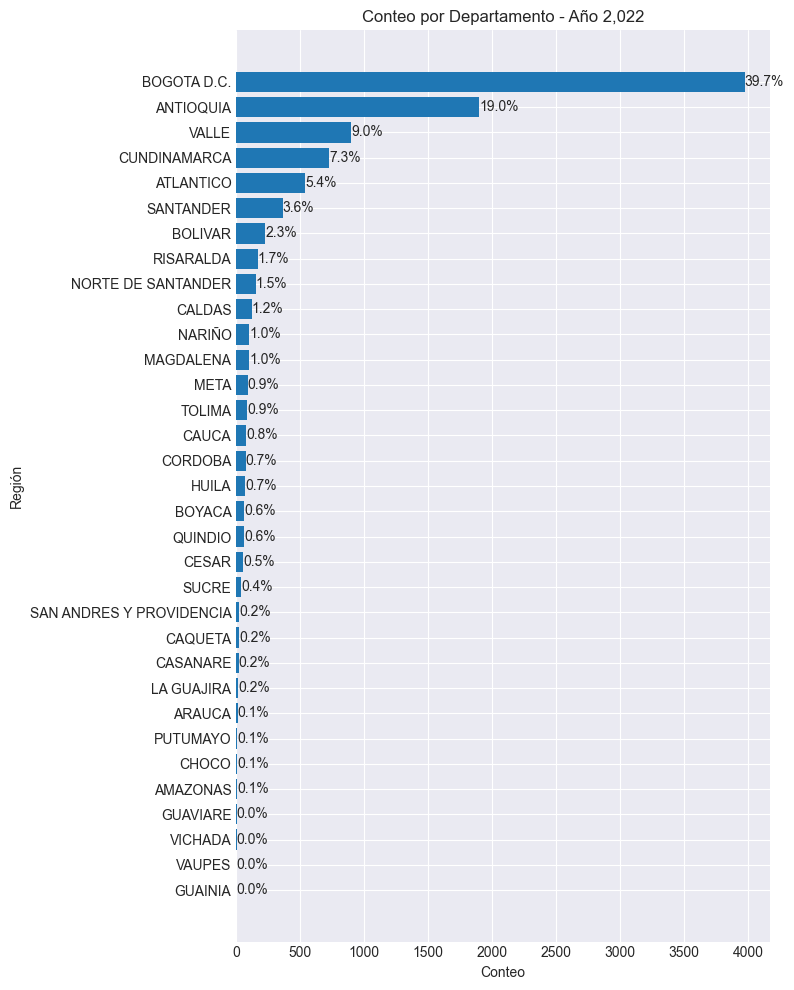

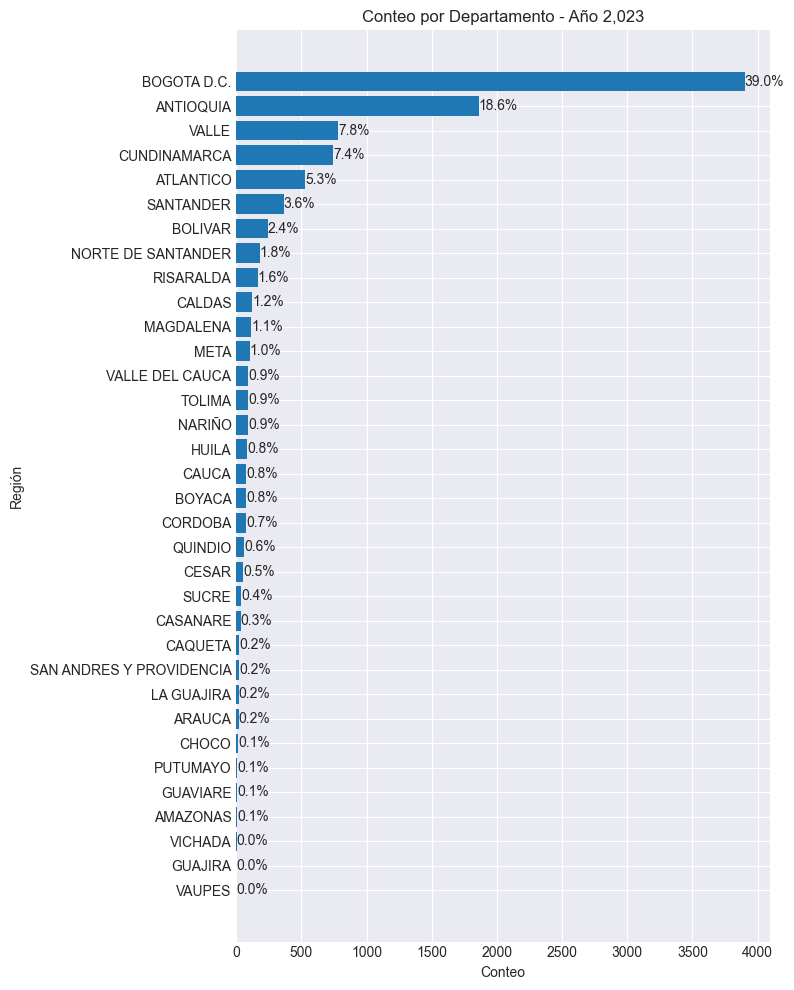

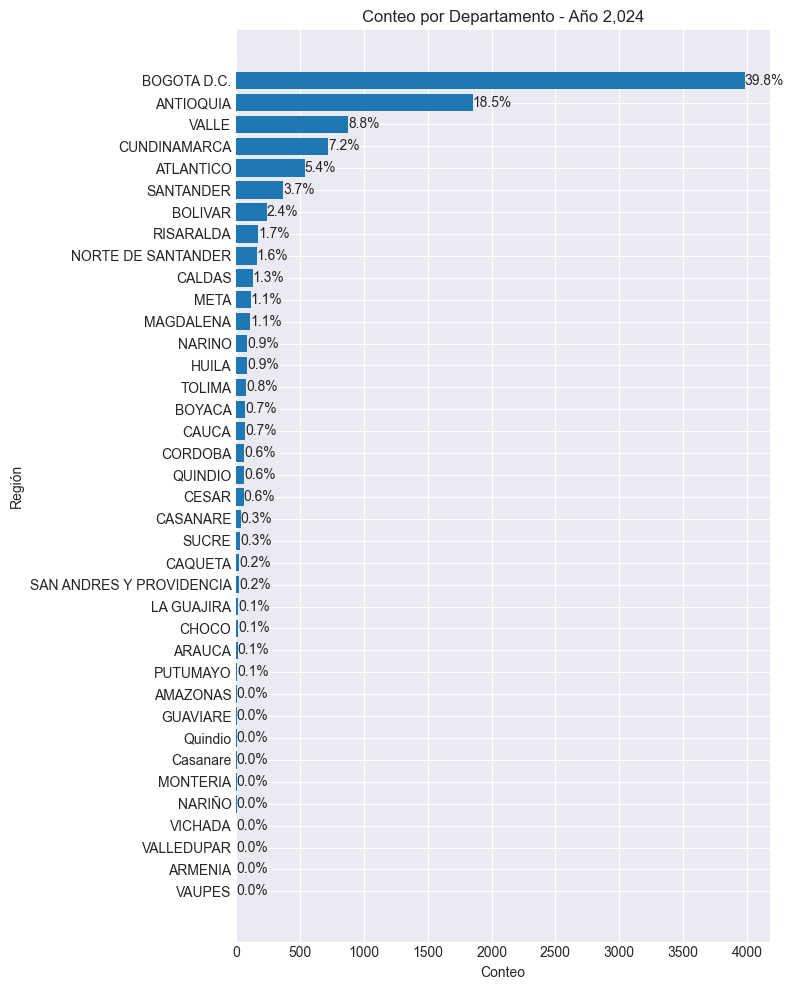

In [ ]:
anios = sorted(df["AÑO DE CORTE"].dropna().unique())

for anio in anios:

    df_anio = df[df["AÑO DE CORTE"] == anio]

    conteo = df_anio["DEPARTAMENTO DOMICILIO"].value_counts().sort_values(ascending=True)


    porcentaje = (conteo / conteo.sum()) * 100

    plt.figure(figsize=(8, 10))
    plt.barh(conteo.index, conteo.values)

    for i, (cnt, pct) in enumerate(zip(conteo.values, porcentaje.values)):
        plt.text(cnt + 0.3, i, f"{pct:.1f}%", va="center")

    plt.xlabel("Conteo")
    plt.ylabel("Región")
    plt.title(f"Conteo por Departamento - Año {anio}")
    plt.tight_layout()
    plt.show()


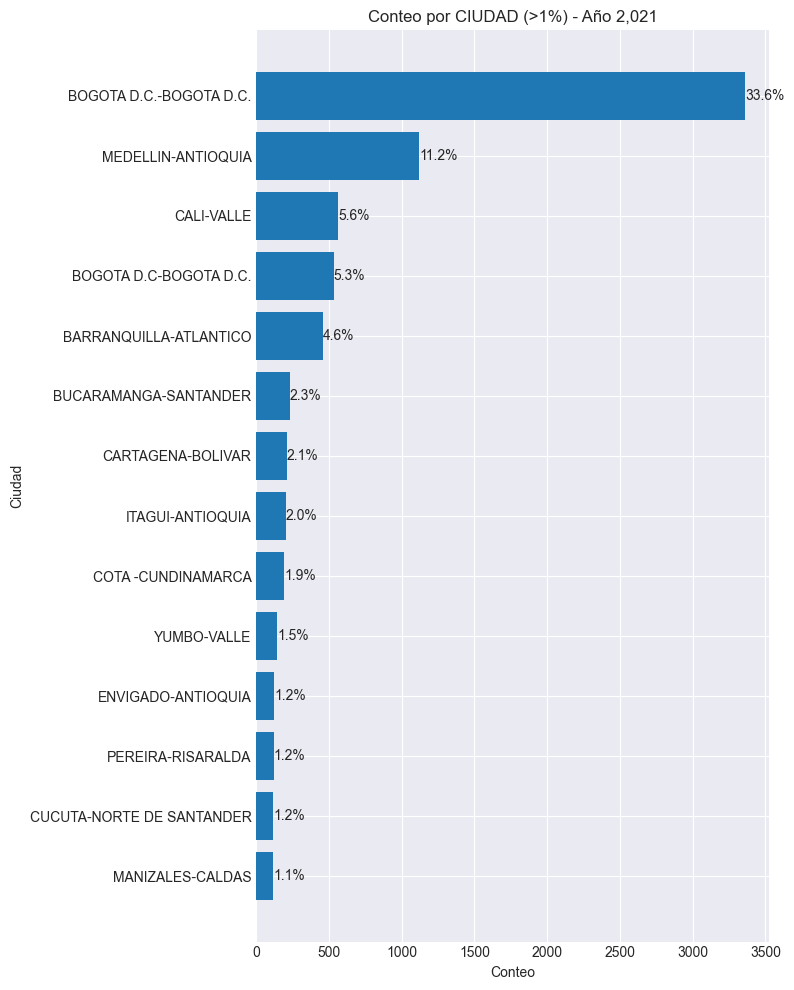

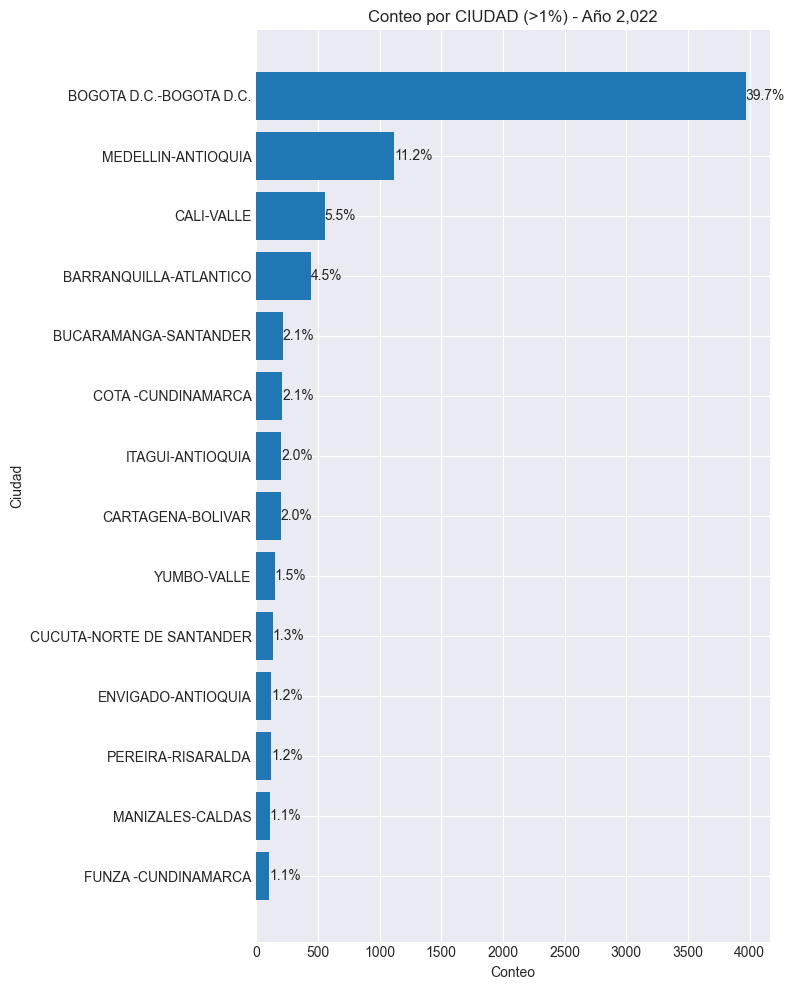

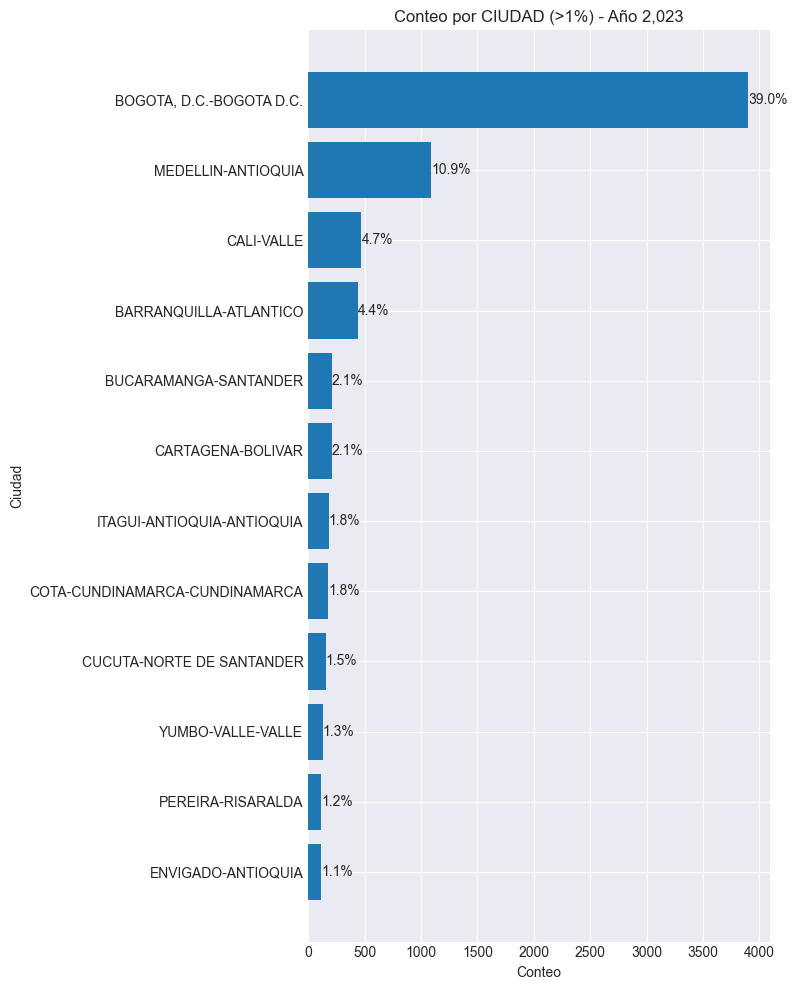

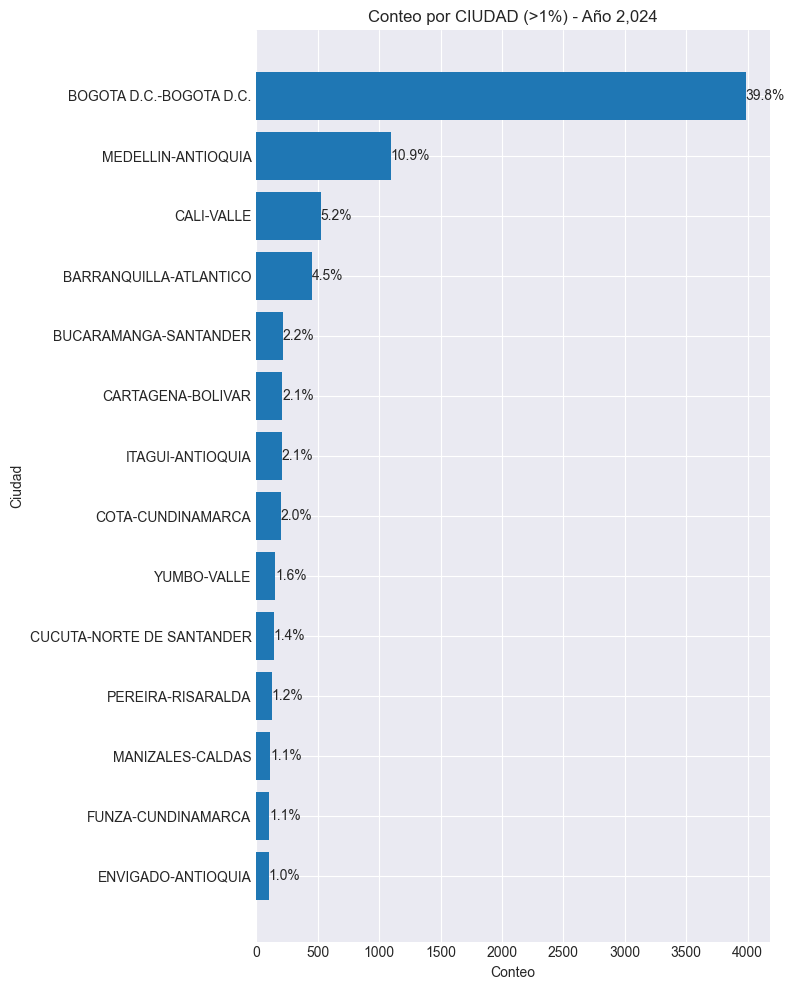

In [41]:
anios = sorted(df["AÑO DE CORTE"].dropna().unique())

for anio in anios:

    df_anio = df[df["AÑO DE CORTE"] == anio]

    conteo = df_anio["CIUDAD DOMICILIO"].value_counts().sort_values(ascending=True)

    porcentaje = (conteo / conteo.sum()) * 100

    mask = porcentaje > 1
    conteo = conteo[mask]
    porcentaje = porcentaje[mask]

    plt.figure(figsize=(8, 10))
    plt.barh(conteo.index, conteo.values)

    for i, (cnt, pct) in enumerate(zip(conteo.values, porcentaje.values)):
        plt.text(cnt + 0.3, i, f"{pct:.1f}%", va="center")

    plt.xlabel("Conteo")
    plt.ylabel("Ciudad")
    plt.title(f"Conteo por CIUDAD (>1%) - Año {anio}")
    plt.tight_layout()
    plt.show()


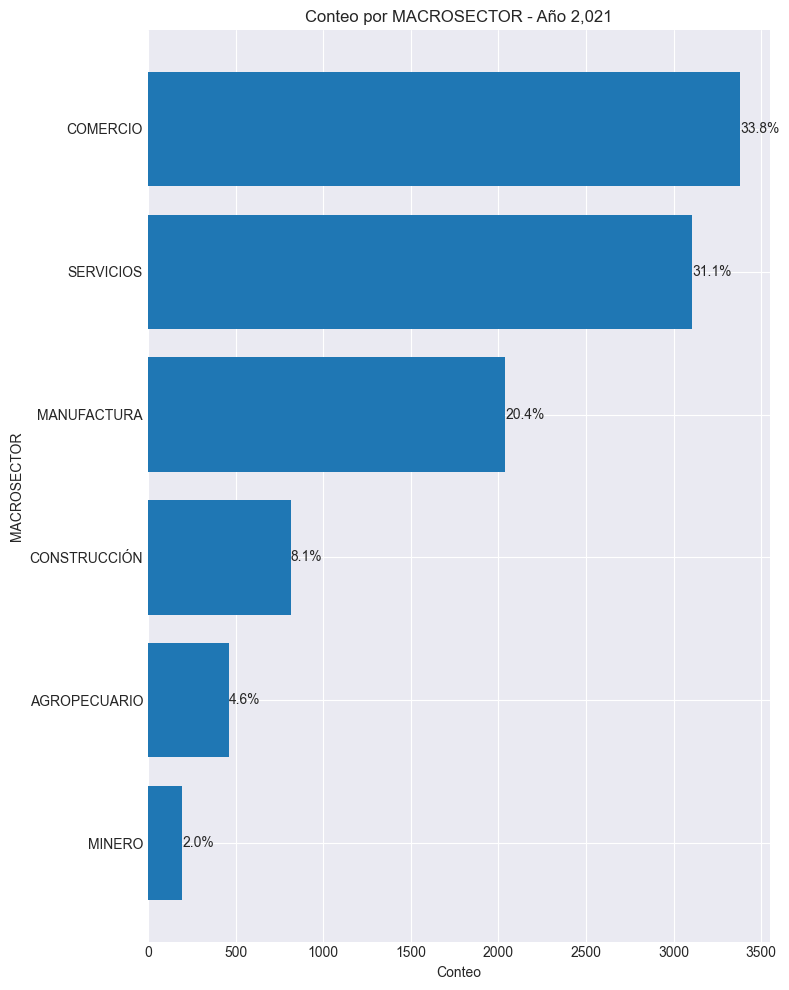

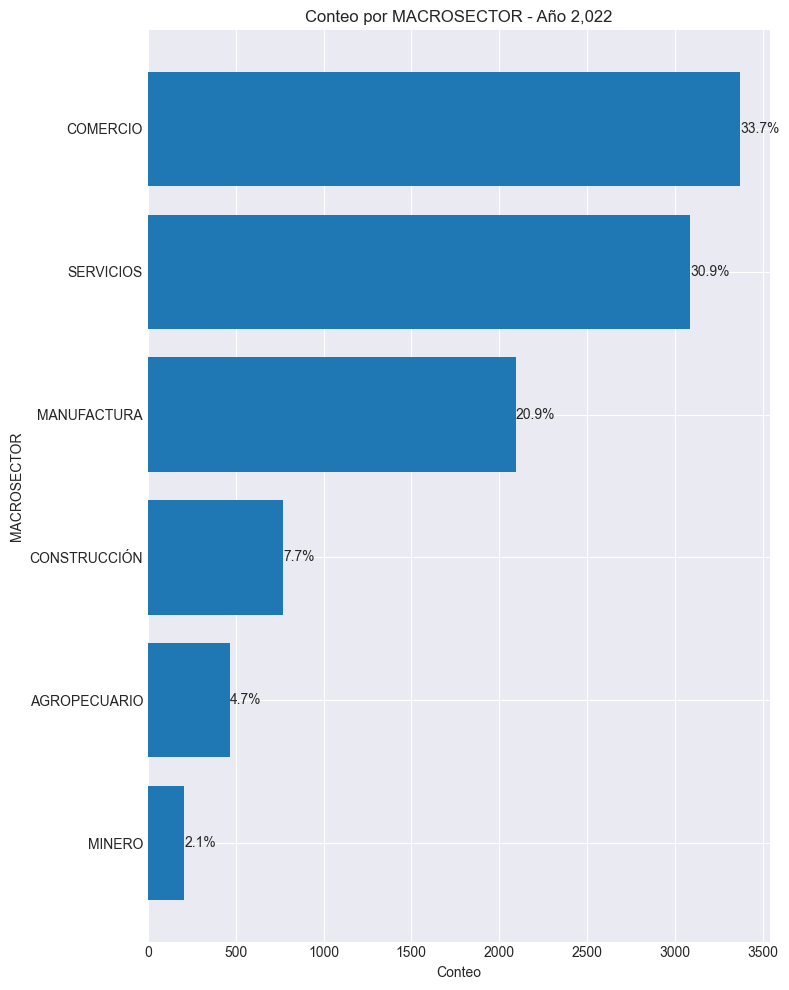

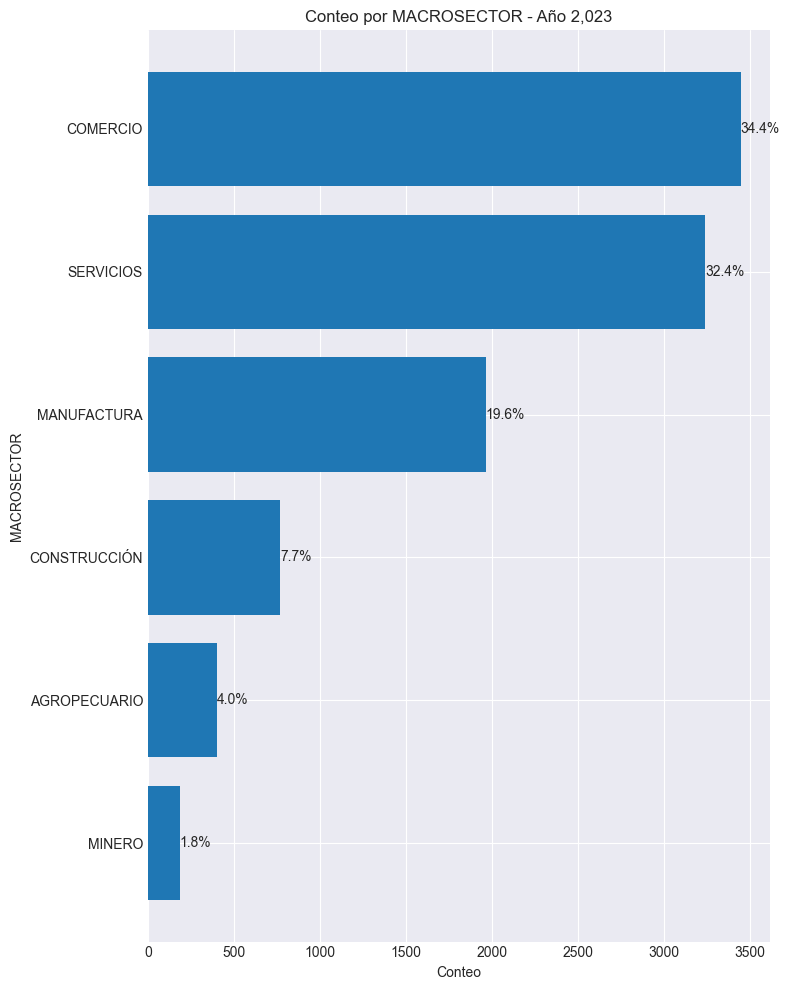

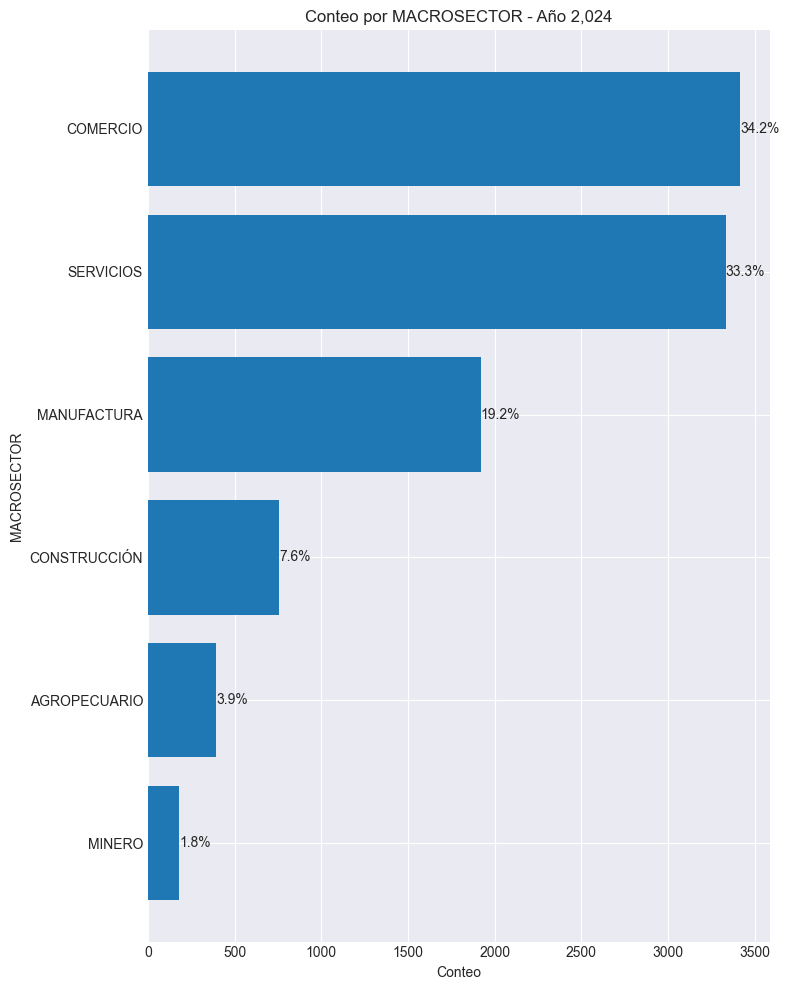

In [42]:
anios = sorted(df["AÑO DE CORTE"].dropna().unique())

for anio in anios:

    df_anio = df[df["AÑO DE CORTE"] == anio]

    conteo = df_anio["MACROSECTOR"].value_counts().sort_values(ascending=True)


    porcentaje = (conteo / conteo.sum()) * 100

    plt.figure(figsize=(8, 10))
    plt.barh(conteo.index, conteo.values)

    for i, (cnt, pct) in enumerate(zip(conteo.values, porcentaje.values)):
        plt.text(cnt + 0.3, i, f"{pct:.1f}%", va="center")

    plt.xlabel("Conteo")
    plt.ylabel("MACROSECTOR")
    plt.title(f"Conteo por MACROSECTOR - Año {anio}")
    plt.tight_layout()
    plt.show()


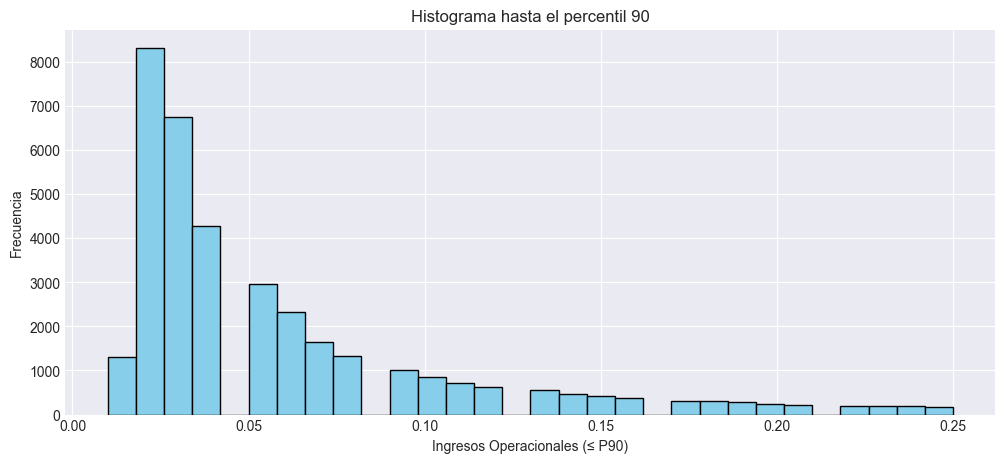

In [8]:
q90 = df["INGRESOS OPERACIONALES"].quantile(0.90)

df_q90 = df[df["INGRESOS OPERACIONALES"] <= q90]


plt.figure(figsize=(12,5))
plt.hist(df_q90["INGRESOS OPERACIONALES"], bins=30,
         color="skyblue", edgecolor="black")

plt.xlabel("Ingresos Operacionales (≤ P90)")
plt.ylabel("Frecuencia")
plt.title("Histograma hasta el percentil 90")
plt.show()


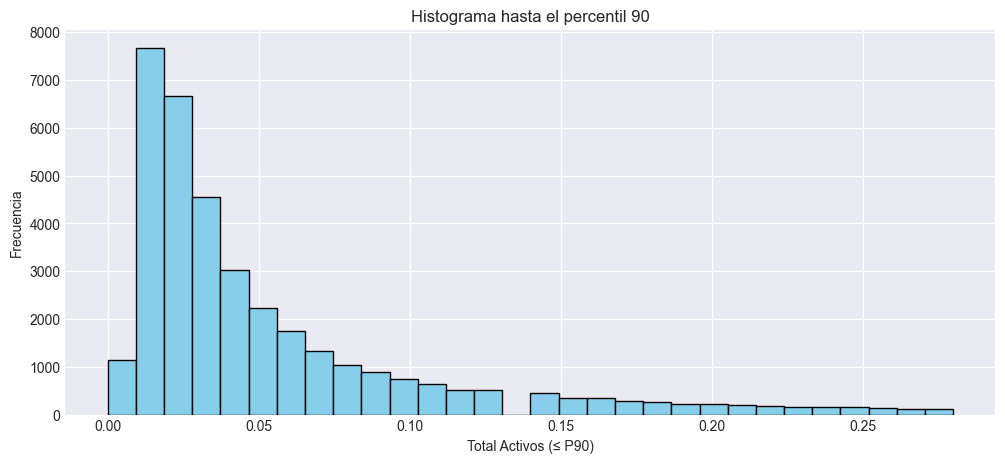

In [9]:
q90 = df["TOTAL ACTIVOS"].quantile(0.90)

df_q90 = df[df["TOTAL ACTIVOS"] <= q90]


plt.figure(figsize=(12,5))
plt.hist(df_q90["TOTAL ACTIVOS"], bins=30,
         color="skyblue", edgecolor="black")

plt.xlabel("Total Activos (≤ P90)")
plt.ylabel("Frecuencia")
plt.title("Histograma hasta el percentil 90")
plt.show()


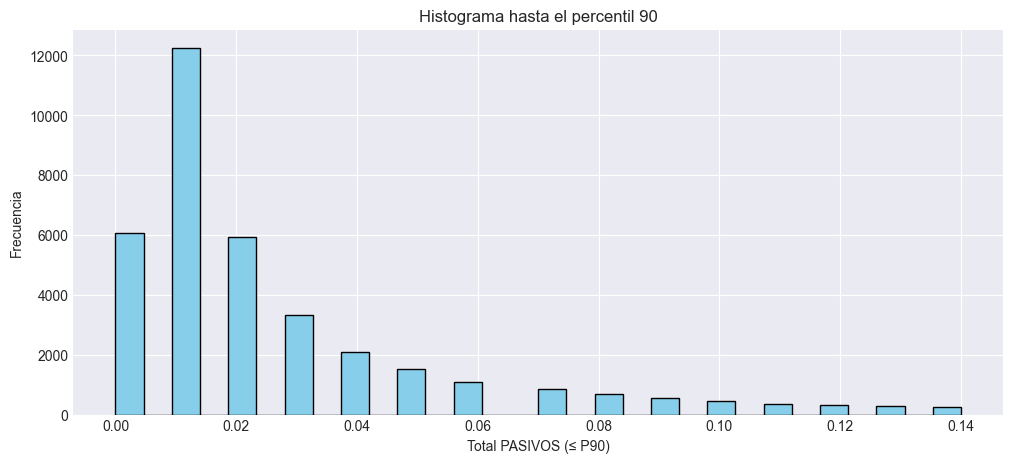

In [10]:
q90 = df["TOTAL PASIVOS"].quantile(0.90)

df_q90 = df[df["TOTAL PASIVOS"] <= q90]


plt.figure(figsize=(12,5))
plt.hist(df_q90["TOTAL PASIVOS"], bins=30,
         color="skyblue", edgecolor="black")

plt.xlabel("Total PASIVOS (≤ P90)")
plt.ylabel("Frecuencia")
plt.title("Histograma hasta el percentil 90")
plt.show()


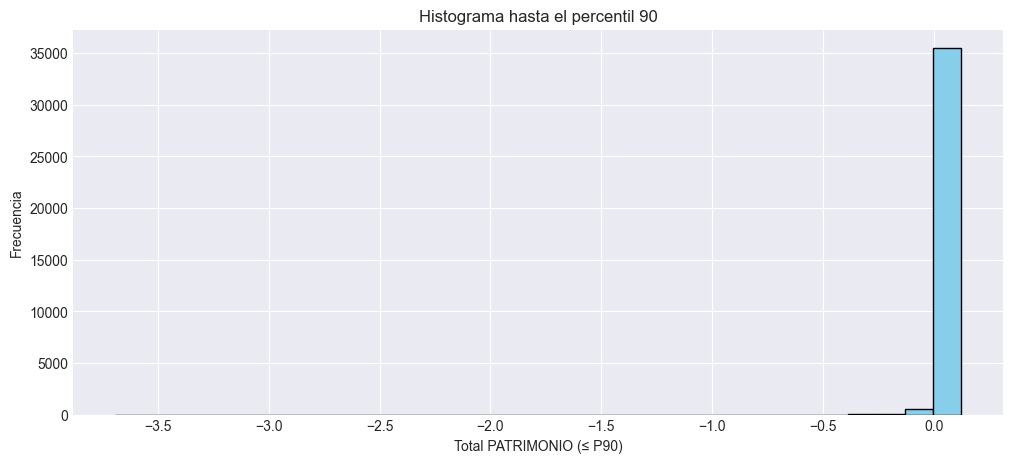

In [11]:
q90 = df["TOTAL PATRIMONIO"].quantile(0.90)

df_q90 = df[df["TOTAL PATRIMONIO"] <= q90]


plt.figure(figsize=(12,5))
plt.hist(df_q90["TOTAL PATRIMONIO"], bins=30,
         color="skyblue", edgecolor="black")

plt.xlabel("Total PATRIMONIO (≤ P90)")
plt.ylabel("Frecuencia")
plt.title("Histograma hasta el percentil 90")
plt.show()


#### Boxplot ganancias por macrosector
Habemos outliers, y no pocos, borrar o evitar modelos sensibles a estos (como smv o knn)

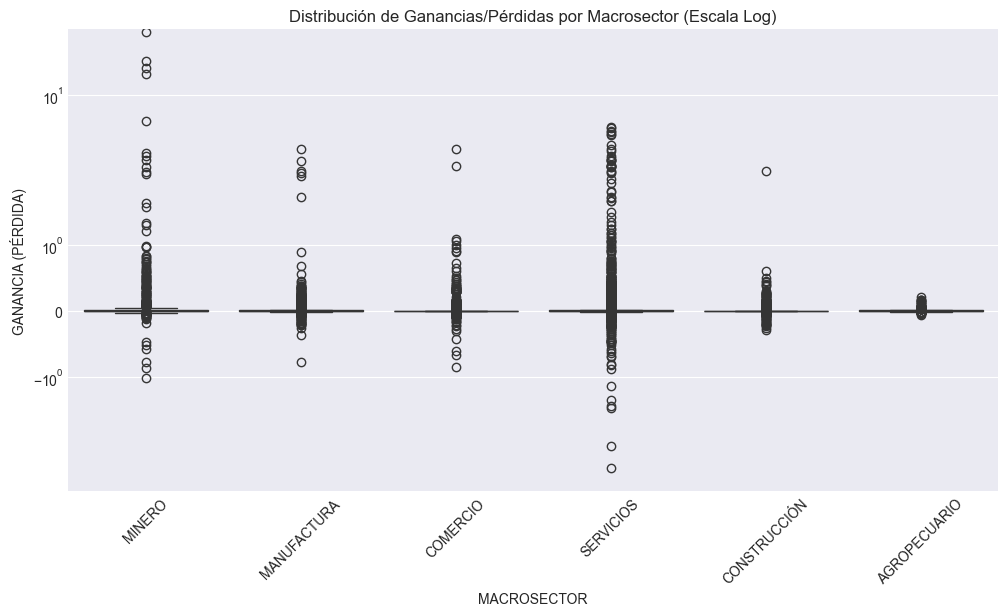

In [12]:
#Rentabilidad por macrosector
plt.figure(figsize=(12, 6))
# Usamos escala logarítmica porque las diferencias entre empresas grandes y pequeñas suelen ser enormes
g = sns.boxplot(data=df, x='MACROSECTOR', y='GANANCIA (PÉRDIDA)', palette="viridis",hue='MACROSECTOR')
g.set_yscale("symlog") # 'symlog' permite ver valores negativos (pérdidas) y positivos en escala log
plt.title("Distribución de Ganancias/Pérdidas por Macrosector (Escala Log)")
plt.xticks(rotation=45)
plt.show()

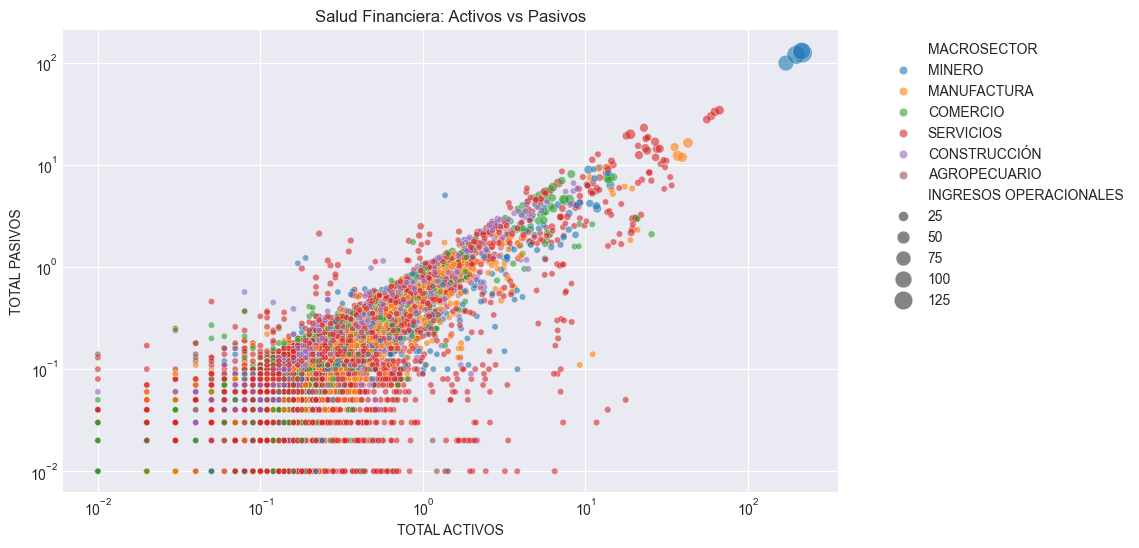

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='TOTAL ACTIVOS', 
    y='TOTAL PASIVOS', 
    hue='MACROSECTOR', #Color por macrosector
    alpha=0.6, #Transparencia
    size='INGRESOS OPERACIONALES', #tamaño proporcional a ingresos
    sizes=(20, 200)
)
plt.title("Salud Financiera: Activos vs Pasivos")
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Evolución de Ingresos en el Tiempo

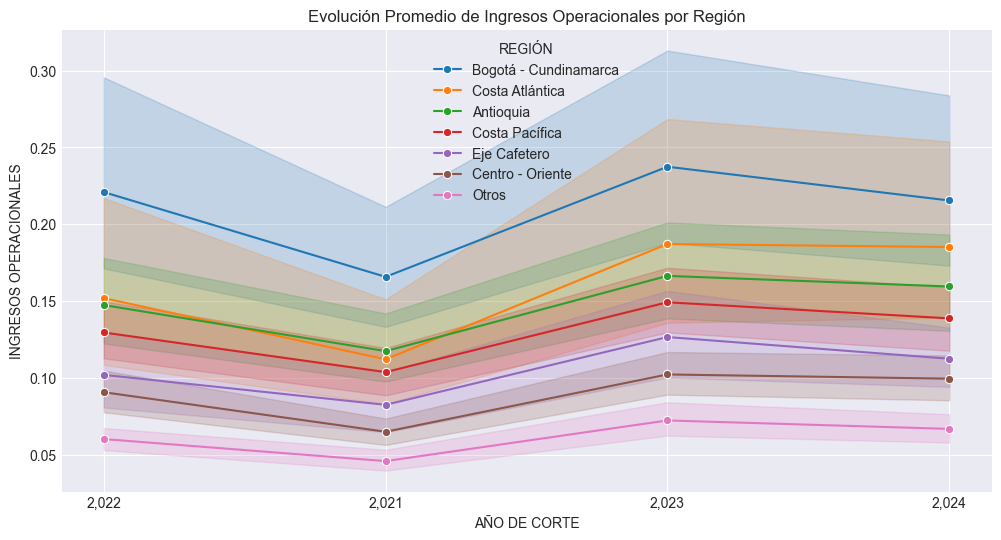

In [14]:
#Por Region
plt.figure(figsize=(12, 6))
# El estimador por defecto es la media (mean), pero puedes usar sum (suma total)
sns.lineplot(
    data=df, 
    x='AÑO DE CORTE', 
    y='INGRESOS OPERACIONALES', 
    hue='REGIÓN', 
    marker="o"
)
plt.title("Evolución Promedio de Ingresos Operacionales por Región")
plt.show()

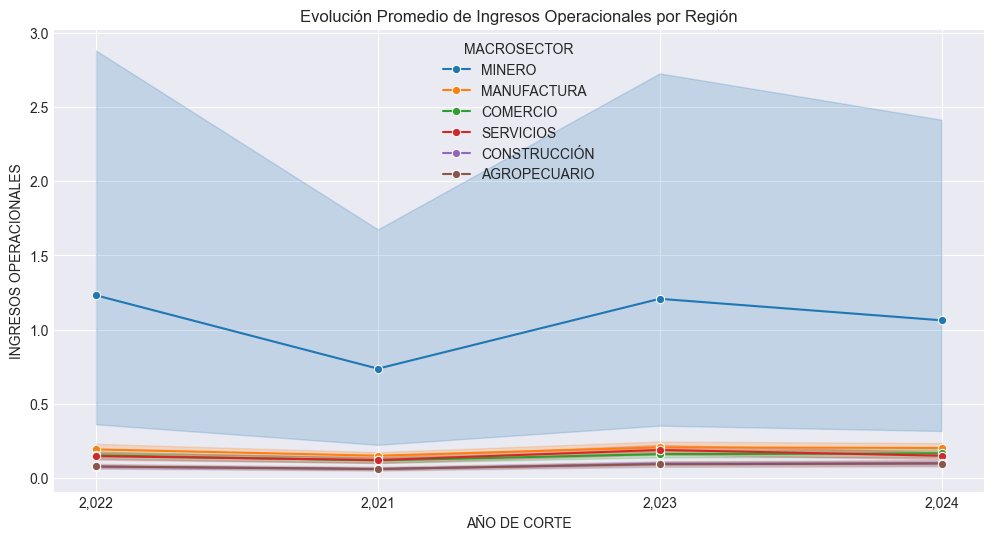

In [15]:
#Por Macrosector
plt.figure(figsize=(12, 6))
# El estimador por defecto es la media (mean), pero puedes usar sum (suma total)
sns.lineplot(
    data=df, 
    x='AÑO DE CORTE', 
    y='INGRESOS OPERACIONALES', 
    hue='MACROSECTOR', 
    marker="o"
)
plt.title("Evolución Promedio de Ingresos Operacionales por Región")
plt.show()

### Heatmap con datos numericos (Ingresos, ganancia, activos, pasivos)

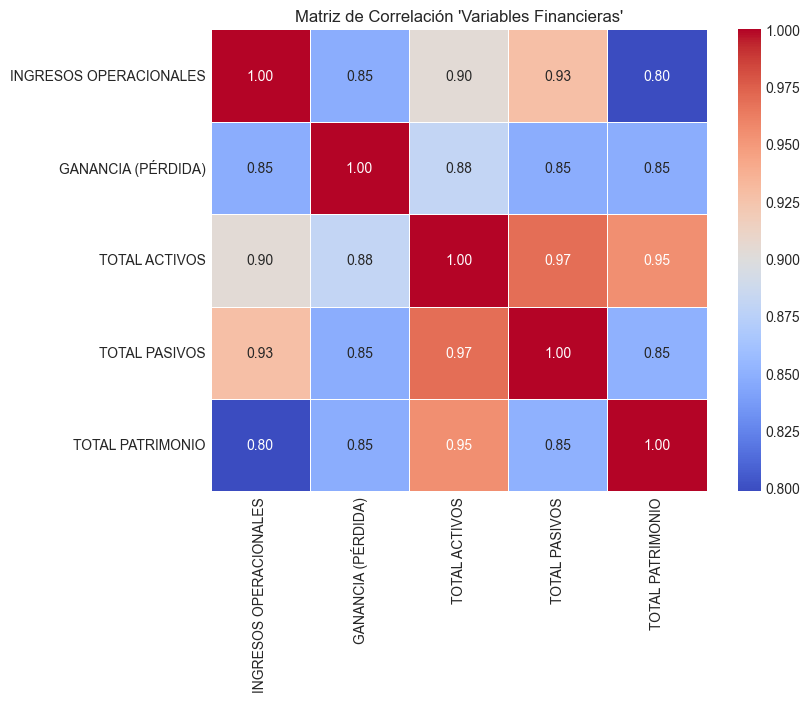

In [16]:
# Seleccionamos solo las columnas numéricas financieras
cols_financieras = ['INGRESOS OPERACIONALES', 'GANANCIA (PÉRDIDA)', 
                    'TOTAL ACTIVOS', 'TOTAL PASIVOS', 'TOTAL PATRIMONIO']

corr_matrix = df[cols_financieras].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación 'Variables Financieras'")
plt.show()

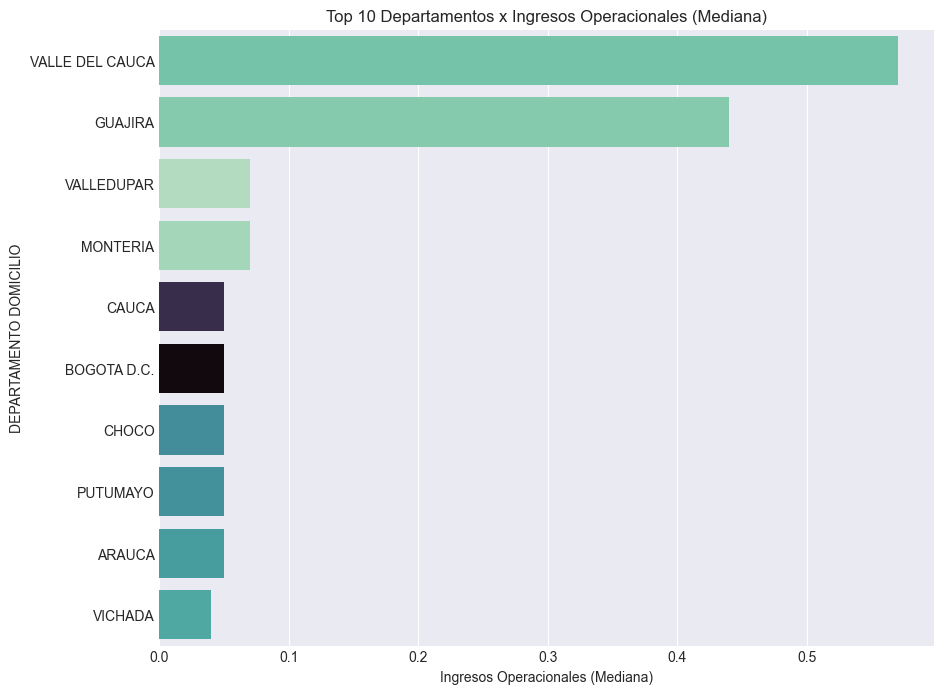

In [17]:
#Mediana de ingresos por departamento
order_data = df.groupby('DEPARTAMENTO DOMICILIO')['INGRESOS OPERACIONALES'].median().sort_values(ascending=False).index[:10]

plt.figure(figsize=(10, 8))
sns.barplot(
    data=df, 
    y='DEPARTAMENTO DOMICILIO', 
    x='INGRESOS OPERACIONALES', 
    estimator=np.median, # Usamos mediana para evitar que Ecopetrol sesgue todo el promedio
    order=order_data,
    palette="mako",
    hue = 'DEPARTAMENTO DOMICILIO',
    errorbar=None
)
plt.title("Top 10 Departamentos x Ingresos Operacionales (Mediana)")
plt.xlabel("Ingresos Operacionales (Mediana)")
plt.show()